# Offline diagnostics for the CASTLE single output networks following Rasp et al. (2018) architecture

# Lat-Lon Plots

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printe
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

In [3]:
module_path = os.path.abspath(os.path.join('..'))
# Relative imports
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  4


In [5]:
from utils.setup import SetupDiagnostics
from neural_networks.load_models import load_models, get_save_plot_folder
from neural_networks.model_diagnostics import ModelDiagnostics
from pathlib import Path
import matplotlib.pyplot as plt
import gc
from utils.variable import Variable_Lev_Metadata

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Load trained CASTLE models

In [6]:
PROJECT_ROOT = Path.cwd().parent.resolve()
base_dir = os.path.join(PROJECT_ROOT, "output_castle", "training_70_vector_mask_net_bespoke_thresholds") 

cfg = os.path.join(base_dir, "cfg_vector_mask_net.yml")
argv  = ["-c", cfg]
plot_dir = Path(base_dir, "plots_offline_evaluation", "plots_lat_lon")

In [7]:
# argv  = ["-c", "../output_castle/eval_nando/single_nn/cfg_single_nn_diagnostics.yml"]
# plot_dir = Path("../output_castle/eval_nando/single_nn/plots_offline_evaluation/plots_lat_lon")

# argv  = ["-c", "../output_castle/eval_nando/causal_single_nn/cfg_causal_single_nn_diagnostics.yml"]
# plot_dir = Path("../output_castle/eval_nando/causal_single_nn/plots_offline_evaluation/plots_lat_lon")

In [8]:
setup = SetupDiagnostics(argv)


Set leaky relu alpha to 0.3



In [9]:
models = load_models(setup, skip_causal_phq=True)


Load model: /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_70_vector_mask_net_bespoke_thresholds/models/VectorMaskNet/thresholdNone/hl_256_256_256_256_256_256_256_256_256-act_LeakyReLU_0.3-e_18/1_0_model.keras

Load model: /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_70_vector_mask_net_bespoke_thresholds/models/VectorMaskNet/thresholdNone/hl_256_256_256_256_256_256_256_256_256-act_LeakyReLU_0.3-e_18/1_1_model.keras

Load model: /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_70_vector_mask_net_bespoke_thresholds/models/VectorMaskNet/thresholdNone/hl_256_256_256_256_256_256_256_256_256-act_LeakyReLU_0.3-e_18/1_2_model.keras

Load model: /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_70_vector_mask_net_bespoke_thresholds/models/VectorMaskNet/thresholdNone/hl_256_256_256_256_256_256

In [10]:
model_key = setup.nn_type

In [11]:
# Note: keys are variables not strings
if setup.nn_type == "CausalSingleNN":
    print(models[model_key][setup.pc_alphas[0]][setup.thresholds[0]].keys())
else: 
    print(models[model_key].keys())

dict_keys(['tphystnd-3.64', 'tphystnd-7.59', 'tphystnd-14.36', 'tphystnd-24.61', 'tphystnd-38.27', 'tphystnd-54.6', 'tphystnd-72.01', 'tphystnd-87.82', 'tphystnd-103.32', 'tphystnd-121.55', 'tphystnd-142.99', 'tphystnd-168.23', 'tphystnd-197.91', 'tphystnd-232.83', 'tphystnd-273.91', 'tphystnd-322.24', 'tphystnd-379.1', 'tphystnd-445.99', 'tphystnd-524.69', 'tphystnd-609.78', 'tphystnd-691.39', 'tphystnd-763.4', 'tphystnd-820.86', 'tphystnd-859.53', 'tphystnd-887.02', 'tphystnd-912.64', 'tphystnd-936.2', 'tphystnd-957.49', 'tphystnd-976.33', 'tphystnd-992.56', 'phq-3.64', 'phq-7.59', 'phq-14.36', 'phq-24.61', 'phq-38.27', 'phq-54.6', 'phq-72.01', 'phq-87.82', 'phq-103.32', 'phq-121.55', 'phq-142.99', 'phq-168.23', 'phq-197.91', 'phq-232.83', 'phq-273.91', 'phq-322.24', 'phq-379.1', 'phq-445.99', 'phq-524.69', 'phq-609.78', 'phq-691.39', 'phq-763.4', 'phq-820.86', 'phq-859.53', 'phq-887.02', 'phq-912.64', 'phq-936.2', 'phq-957.49', 'phq-976.33', 'phq-992.56', 'fsnt', 'fsns', 'flnt', 'fl

## Lat-lon plots

In [12]:
# This variable does not exist in the code (but key nn_type is the same)
setup.model_type = model_key

In [13]:
if setup.nn_type == "CausalSingleNN":
    md = ModelDiagnostics(setup=setup, 
                          models=models[model_key][setup.pc_alphas[0]][setup.thresholds[0]])
else: 
    md = ModelDiagnostics(setup=setup, 
                          models=models[model_key]) 

In [14]:
md

### Single Variable

In [15]:
var = Variable_Lev_Metadata.parse_var_name("tphystnd-379.1") # prect, fsnt


variable fsnt

Plotting double_xy for variable fsnt

Test batch size = 8192.

Opening dataset /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

opening as h5py /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

Saved plot fsnt_map_time-1_diff.png.

variable fsns

Plotting double_xy for variable fsns

Test batch size = 8192.

Opening dataset /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

opening as h5py /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc


FigureCanvasAgg is non-interactive, and thus cannot be shown



Saved plot fsns_map_time-1_diff.png.

variable flnt

Plotting double_xy for variable flnt

Test batch size = 8192.

Opening dataset /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

opening as h5py /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc


FigureCanvasAgg is non-interactive, and thus cannot be shown



Saved plot flnt_map_time-1_diff.png.

variable flns

Plotting double_xy for variable flns

Test batch size = 8192.

Opening dataset /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

opening as h5py /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc


FigureCanvasAgg is non-interactive, and thus cannot be shown



Saved plot flns_map_time-1_diff.png.

variable prect

Plotting double_xy for variable prect

Test batch size = 8192.

Opening dataset /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

opening as h5py /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc


FigureCanvasAgg is non-interactive, and thus cannot be shown



Saved plot prect_map_time-1_diff.png.


FigureCanvasAgg is non-interactive, and thus cannot be shown


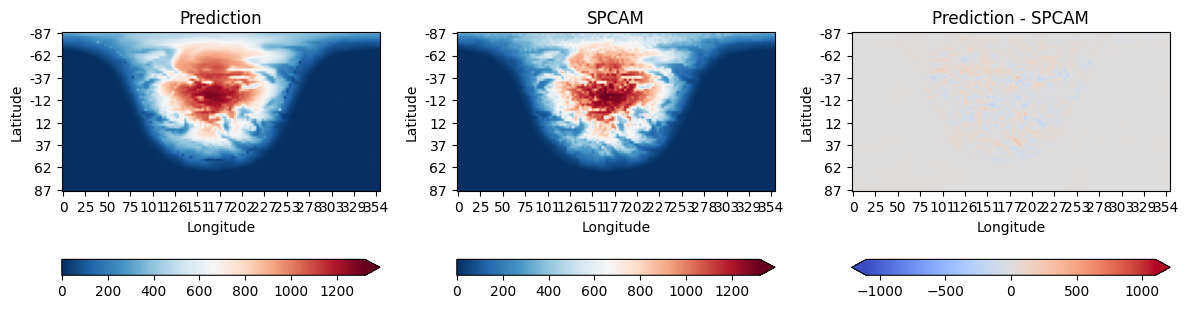

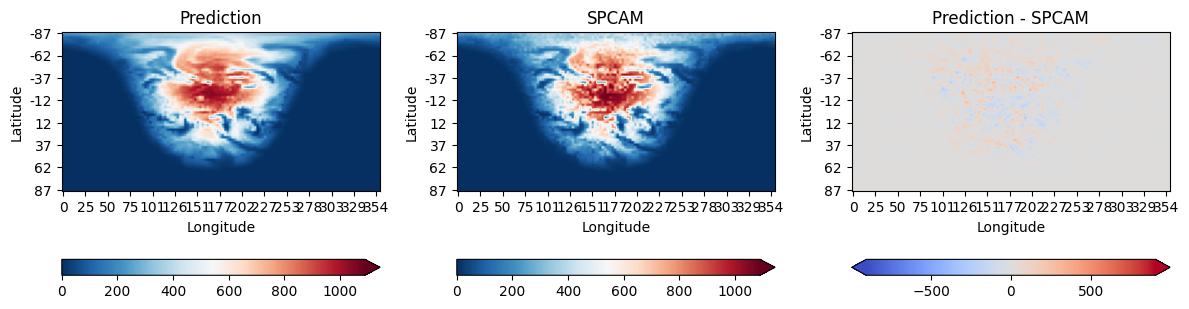

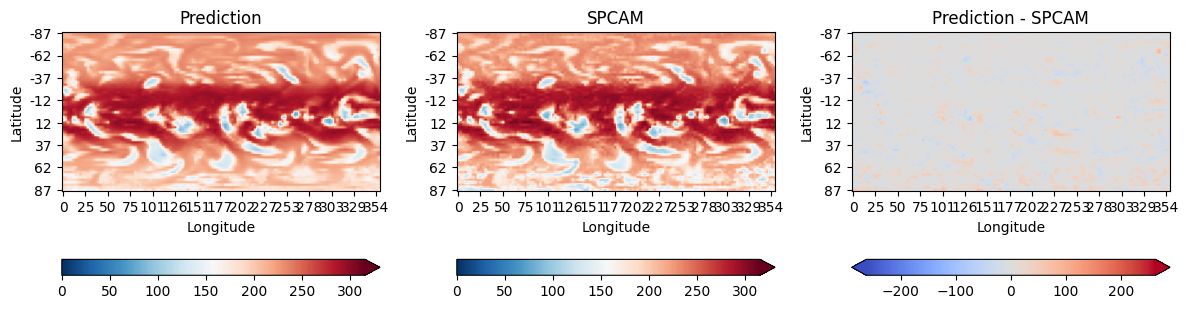

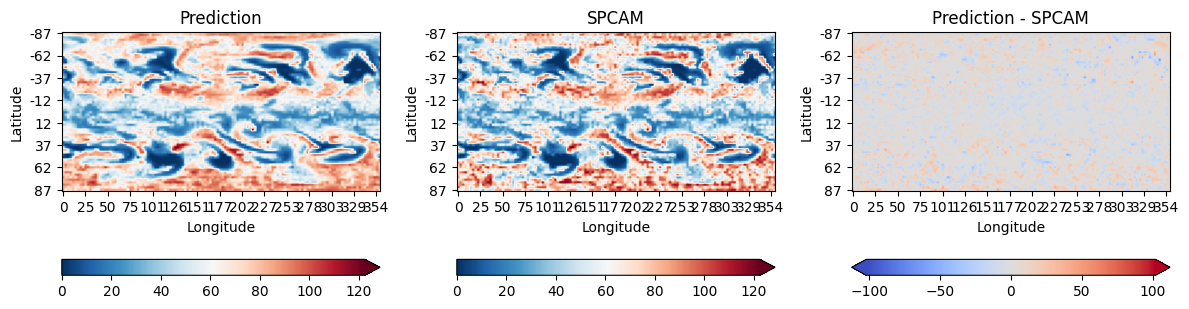

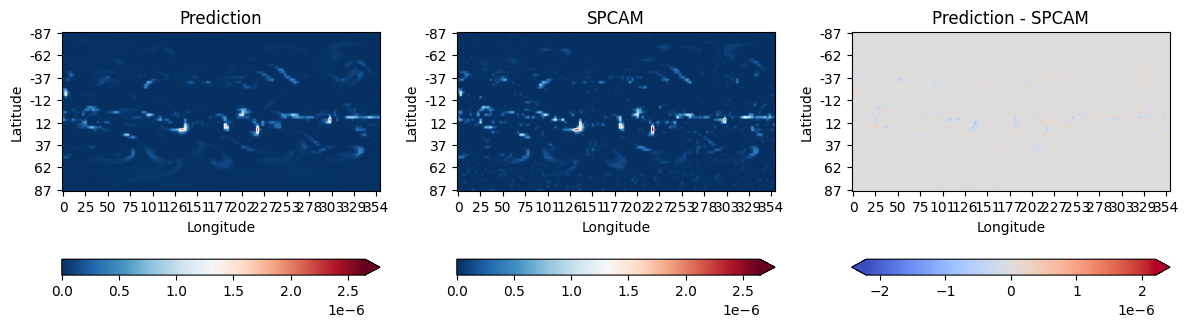

In [17]:
keys = list(models[model_key].keys())
for var in keys[-5:]:
    print(f"\nvariable {var}")
    fig, axes = md.plot_double_xy(1, var, diff=True, nTime=False, cmap="RdBu_r", save=plot_dir)
    fig.show()

In [ ]:
plt.close()


Plotting double_xy for variable fsnt

new version was loaded
Test batch size = 8192.


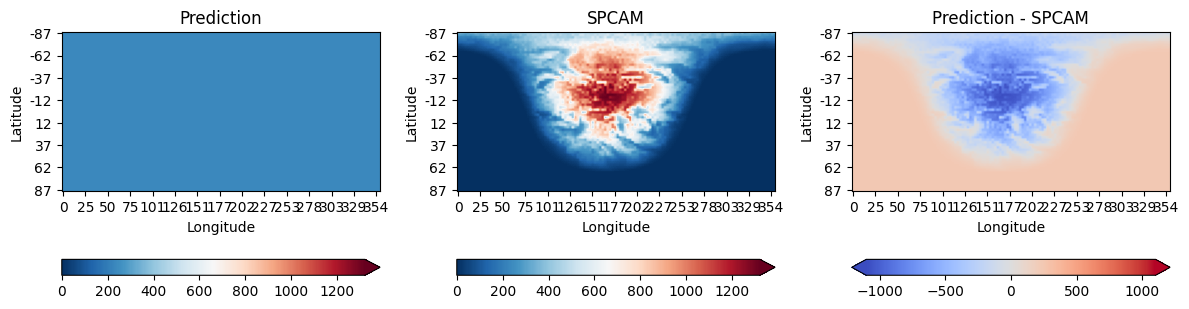

In [33]:
fig, axes = md.plot_double_xy(1, var, diff=True, nTime=False, cmap="RdBu_r")
fig.show()

In [ ]:
plt.close()

In [34]:
_ = md.plot_double_xy(1, var, diff=True, nTime=False, cmap="RdBu_r", save=plot_dir, show_plot=False)



Plotting double_xy for variable fsnt

new version was loaded
Test batch size = 8192.
Saved plot fsnt_map_time-1_diff.png.

Closed plot for variable fsnt




Plotting double_xy for variable fsnt

new version was loaded
Test batch size = 8192.
Time samples: 90
Saved plot fsnt_map_time-mean-90steps_diff.png.


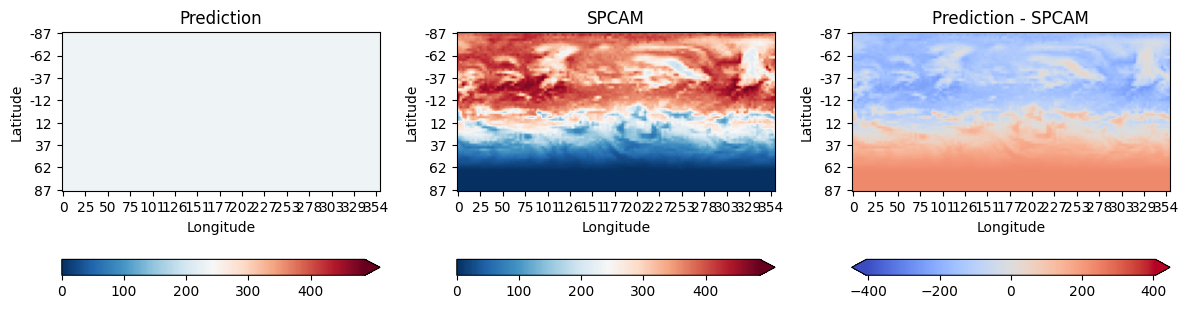

In [35]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90
fig, axes = md.plot_double_xy("mean", var, diff=True, nTime=90, cmap="RdBu_r", save=plot_dir)
fig.show()

In [ ]:
plt.close()

### All variables

In [16]:
# Not function parameters, uses variables that are set in Notebook cells!!
def run_plot_xy():
    if setup.nn_type == "CausalSingleNN":
        dict_keys = models[model_key][setup.pc_alphas[0]][setup.thresholds[0]].keys()
    else: 
        dict_keys = models[model_key].keys()
        
    for var in list(dict_keys):
        print(f"\n\n---- Variable {var}")
        _ = md.plot_double_xy(i_time, var, diff=diff, nTime=n_time, stats=stats, cmap="RdBu_r", show_plot=False, save=plot_dir)
        
        plt.close()
        gc.collect()

#### Time step 1 without diff

In [22]:
i_time = 1
diff = False
n_time = False
stats = False

run_plot_xy()



---- Variable tphystnd-3.64

Plotting double_xy for variable tphystnd

Test batch size = 8192.

Saved plot tphystnd-3.64_map_time-1.png.

Closed plot for variable tphystnd-3.64



---- Variable tphystnd-7.59

Plotting double_xy for variable tphystnd

Test batch size = 8192.

Saved plot tphystnd-7.59_map_time-1.png.

Closed plot for variable tphystnd-7.59



---- Variable tphystnd-14.36

Plotting double_xy for variable tphystnd

Test batch size = 8192.

Saved plot tphystnd-14.36_map_time-1.png.

Closed plot for variable tphystnd-14.36



---- Variable tphystnd-24.61

Plotting double_xy for variable tphystnd

Test batch size = 8192.

Saved plot tphystnd-24.61_map_time-1.png.

Closed plot for variable tphystnd-24.61



---- Variable tphystnd-38.27

Plotting double_xy for variable tphystnd

Test batch size = 8192.

Saved plot tphystnd-38.27_map_time-1.png.

Closed plot for variable tphystnd-38.27



---- Variable tphystnd-54.6

Plotting double_xy for variable tphystnd

Test batch size = 

#### Time step 1 with diff

In [23]:
i_time = 1
diff = True
n_time = False
stats = False

run_plot_xy()



---- Variable tphystnd-3.64

Plotting double_xy for variable tphystnd

Test batch size = 8192.

Saved plot tphystnd-3.64_map_time-1_diff.png.

Closed plot for variable tphystnd-3.64



---- Variable tphystnd-7.59

Plotting double_xy for variable tphystnd

Test batch size = 8192.

Saved plot tphystnd-7.59_map_time-1_diff.png.

Closed plot for variable tphystnd-7.59



---- Variable tphystnd-14.36

Plotting double_xy for variable tphystnd

Test batch size = 8192.

Saved plot tphystnd-14.36_map_time-1_diff.png.

Closed plot for variable tphystnd-14.36



---- Variable tphystnd-24.61

Plotting double_xy for variable tphystnd

Test batch size = 8192.

Saved plot tphystnd-24.61_map_time-1_diff.png.

Closed plot for variable tphystnd-24.61



---- Variable tphystnd-38.27

Plotting double_xy for variable tphystnd

Test batch size = 8192.

Saved plot tphystnd-38.27_map_time-1_diff.png.

Closed plot for variable tphystnd-38.27



---- Variable tphystnd-54.6

Plotting double_xy for variable tph

#### Mean without diff

In [19]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90 
# Or: 120 as Nando did
i_time = "mean"
diff = False
n_time = 1440
stats = False

run_plot_xy()

tphystnd-3.64

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-3.64_map_time-mean.png.

Closed plot for variable tphystnd-3.64

tphystnd-7.59

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-7.59_map_time-mean.png.

Closed plot for variable tphystnd-7.59

tphystnd-14.36

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-14.36_map_time-mean.png.

Closed plot for variable tphystnd-14.36

tphystnd-24.61

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-24.61_map_time-mean.png.

Closed plot for variable tphystnd-24.61

tphystnd-38.27

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-38.27_map_time-mean.png.

Closed plot for variable tphystnd-38.27

tphystnd-54.6

Plotting double_xy for variable tphystnd

Test batc

#### Mean with diff

In [17]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90
i_time = "mean"
diff = True
n_time = 1440
stats = False

run_plot_xy()

tphystnd-3.64

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-3.64_map_time-mean_diff.png.

Closed plot for variable tphystnd-3.64

tphystnd-7.59

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-7.59_map_time-mean_diff.png.

Closed plot for variable tphystnd-7.59

tphystnd-14.36

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-14.36_map_time-mean_diff.png.

Closed plot for variable tphystnd-14.36

tphystnd-24.61

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-24.61_map_time-mean_diff.png.

Closed plot for variable tphystnd-24.61

tphystnd-38.27

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-38.27_map_time-mean_diff.png.

Closed plot for variable tphystnd-38.27

tphystnd-54.6

Plotting double_xy for var

#### Mean with r2

In [18]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90
i_time = "mean"
diff = False
n_time = 1440
stats = "r2"

run_plot_xy()

tphystnd-3.64

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-3.64_map_time-mean_stats.png.

Closed plot for variable tphystnd-3.64

tphystnd-7.59

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-7.59_map_time-mean_stats.png.

Closed plot for variable tphystnd-7.59

tphystnd-14.36

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-14.36_map_time-mean_stats.png.

Closed plot for variable tphystnd-14.36

tphystnd-24.61

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-24.61_map_time-mean_stats.png.

Closed plot for variable tphystnd-24.61

tphystnd-38.27

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-38.27_map_time-mean_stats.png.

Closed plot for variable tphystnd-38.27

tphystnd-54.6

Plotting double_xy fo

divide by zero encountered in divide


Saved plot phq-3.64_map_time-mean_stats.png.

Closed plot for variable phq-3.64

phq-7.59

Plotting double_xy for variable phq

Test batch size = 8192.
Time samples: 1440


divide by zero encountered in divide


Saved plot phq-7.59_map_time-mean_stats.png.

Closed plot for variable phq-7.59

phq-14.36

Plotting double_xy for variable phq

Test batch size = 8192.
Time samples: 1440
Saved plot phq-14.36_map_time-mean_stats.png.

Closed plot for variable phq-14.36

phq-24.61

Plotting double_xy for variable phq

Test batch size = 8192.
Time samples: 1440
Saved plot phq-24.61_map_time-mean_stats.png.

Closed plot for variable phq-24.61

phq-38.27

Plotting double_xy for variable phq

Test batch size = 8192.
Time samples: 1440
Saved plot phq-38.27_map_time-mean_stats.png.

Closed plot for variable phq-38.27

phq-54.6

Plotting double_xy for variable phq

Test batch size = 8192.
Time samples: 1440
Saved plot phq-54.6_map_time-mean_stats.png.

Closed plot for variable phq-54.6

phq-72.01

Plotting double_xy for variable phq

Test batch size = 8192.
Time samples: 1440
Saved plot phq-72.01_map_time-mean_stats.png.

Closed plot for variable phq-72.01

phq-87.82

Plotting double_xy for variable phq

Test

divide by zero encountered in divide


Saved plot fsnt_map_time-mean_stats.png.

Closed plot for variable fsnt

fsns

Plotting double_xy for variable fsns

Test batch size = 8192.
Time samples: 1440


divide by zero encountered in divide


Saved plot fsns_map_time-mean_stats.png.

Closed plot for variable fsns

flnt

Plotting double_xy for variable flnt

Test batch size = 8192.
Time samples: 1440
Saved plot flnt_map_time-mean_stats.png.

Closed plot for variable flnt

flns

Plotting double_xy for variable flns

Test batch size = 8192.
Time samples: 1440
Saved plot flns_map_time-mean_stats.png.

Closed plot for variable flns

prect

Plotting double_xy for variable prect

Test batch size = 8192.
Time samples: 1440
Saved plot prect_map_time-mean_stats.png.

Closed plot for variable prect



#### Mean with mse

In [19]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90
i_time = "mean"
diff = False
n_time = 1440
stats = "mse"

run_plot_xy()

tphystnd-3.64

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-3.64_map_time-mean_stats.png.

Closed plot for variable tphystnd-3.64

tphystnd-7.59

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-7.59_map_time-mean_stats.png.

Closed plot for variable tphystnd-7.59

tphystnd-14.36

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-14.36_map_time-mean_stats.png.

Closed plot for variable tphystnd-14.36

tphystnd-24.61

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-24.61_map_time-mean_stats.png.

Closed plot for variable tphystnd-24.61

tphystnd-38.27

Plotting double_xy for variable tphystnd

Test batch size = 8192.
Time samples: 1440
Saved plot tphystnd-38.27_map_time-mean_stats.png.

Closed plot for variable tphystnd-38.27

tphystnd-54.6

Plotting double_xy fo

divide by zero encountered in divide


Saved plot phq-3.64_map_time-mean_stats.png.

Closed plot for variable phq-3.64

phq-7.59

Plotting double_xy for variable phq

Test batch size = 8192.
Time samples: 1440


divide by zero encountered in divide


Saved plot phq-7.59_map_time-mean_stats.png.

Closed plot for variable phq-7.59

phq-14.36

Plotting double_xy for variable phq

Test batch size = 8192.
Time samples: 1440
Saved plot phq-14.36_map_time-mean_stats.png.

Closed plot for variable phq-14.36

phq-24.61

Plotting double_xy for variable phq

Test batch size = 8192.
Time samples: 1440
Saved plot phq-24.61_map_time-mean_stats.png.

Closed plot for variable phq-24.61

phq-38.27

Plotting double_xy for variable phq

Test batch size = 8192.
Time samples: 1440
Saved plot phq-38.27_map_time-mean_stats.png.

Closed plot for variable phq-38.27

phq-54.6

Plotting double_xy for variable phq

Test batch size = 8192.
Time samples: 1440
Saved plot phq-54.6_map_time-mean_stats.png.

Closed plot for variable phq-54.6

phq-72.01

Plotting double_xy for variable phq

Test batch size = 8192.
Time samples: 1440
Saved plot phq-72.01_map_time-mean_stats.png.

Closed plot for variable phq-72.01

phq-87.82

Plotting double_xy for variable phq

Test

divide by zero encountered in divide


Saved plot fsnt_map_time-mean_stats.png.

Closed plot for variable fsnt

fsns

Plotting double_xy for variable fsns

Test batch size = 8192.
Time samples: 1440


divide by zero encountered in divide


Saved plot fsns_map_time-mean_stats.png.

Closed plot for variable fsns

flnt

Plotting double_xy for variable flnt

Test batch size = 8192.
Time samples: 1440
Saved plot flnt_map_time-mean_stats.png.

Closed plot for variable flnt

flns

Plotting double_xy for variable flns

Test batch size = 8192.
Time samples: 1440
Saved plot flns_map_time-mean_stats.png.

Closed plot for variable flns

prect

Plotting double_xy for variable prect

Test batch size = 8192.
Time samples: 1440
Saved plot prect_map_time-mean_stats.png.

Closed plot for variable prect



#### All stats and diff

In [17]:
i_time = "mean"
diff = False
n_time = 1440
stats = ["mse", "r2"]

run_plot_xy()



---- Variable phq-691.39

Plotting double_xy for variable phq

Test batch size = 8192.

Opening dataset /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

opening as h5py /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc
Time samples: 1440

Saved plot phq-691.39_map_time-mean-1440steps.png.
Closed plot for variable phq-691.39 for mean without diff.


Saved plot phq-691.39_map_time-mean-1440steps_diff.png.
Closed plot for variable phq-691.39 for mean with diff.


Saved plot phq-691.39_map_time-mean-1440steps_stats-mse.png.
Closed plot for variable phq-691.39 with stats=mse, diff=False.


Saved plot phq-691.39_map_time-mean-1440steps_diff_stats-mse.png.
Closed plot for variable phq-691.39 with stats=mse, diff=True.


Saved plot phq-691.39_map_time-mean-1440steps_stats-r2.png.
Closed plot for variable phq-691.39 with stats=r2, diff=False.


Save

divide by zero encountered in divide



Saved plot fsnt_map_time-mean-1440steps.png.
Closed plot for variable fsnt for mean without diff.


Saved plot fsnt_map_time-mean-1440steps_diff.png.
Closed plot for variable fsnt for mean with diff.


Saved plot fsnt_map_time-mean-1440steps_stats-mse.png.
Closed plot for variable fsnt with stats=mse, diff=False.


Saved plot fsnt_map_time-mean-1440steps_diff_stats-mse.png.
Closed plot for variable fsnt with stats=mse, diff=True.


Saved plot fsnt_map_time-mean-1440steps_stats-r2.png.
Closed plot for variable fsnt with stats=r2, diff=False.


Saved plot fsnt_map_time-mean-1440steps_diff_stats-r2.png.
Closed plot for variable fsnt with stats=r2, diff=True.



---- Variable fsns

Plotting double_xy for variable fsns

Test batch size = 8192.

Opening dataset /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

opening as h5py /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2

divide by zero encountered in divide



Saved plot fsns_map_time-mean-1440steps.png.
Closed plot for variable fsns for mean without diff.


Saved plot fsns_map_time-mean-1440steps_diff.png.
Closed plot for variable fsns for mean with diff.


Saved plot fsns_map_time-mean-1440steps_stats-mse.png.
Closed plot for variable fsns with stats=mse, diff=False.


Saved plot fsns_map_time-mean-1440steps_diff_stats-mse.png.
Closed plot for variable fsns with stats=mse, diff=True.


Saved plot fsns_map_time-mean-1440steps_stats-r2.png.
Closed plot for variable fsns with stats=r2, diff=False.


Saved plot fsns_map_time-mean-1440steps_diff_stats-r2.png.
Closed plot for variable fsns with stats=r2, diff=True.



---- Variable flnt

Plotting double_xy for variable flnt

Test batch size = 8192.

Opening dataset /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2021_09_02_TEST_For_Nando.nc

opening as h5py /p/project/icon-a-ml/kuehbacher1/projects/iglesias-suarez2yxx_spuriouslinks/SPCAM_tb_preproc/2